In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [5]:
!kaggle datasets download -d daveianhickey/2000-16-traffic-flow-england-scotland-wales

 96% 127M/132M [00:01<00:00, 60.5MB/s]
100% 132M/132M [00:01<00:00, 83.0MB/s]


In [6]:
!ls

2000-16-traffic-flow-england-scotland-wales.zip
accident_coords_update.ipynb
accidents_2005_to_2007.csv
accidents_2009_to_2011.csv
accidents_2012_to_2014.csv
allaccidents.csv
Areas.shp
kaggle.json
lad.csv
Local_Authority_Districts_Dec_2016.geojson
numeric_accidents.csv
ukTrafficAADF.csv


In [7]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  2000-16-traffic-flow-england-scotland-wales.zip
replace Areas.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Areas.shp               
replace Local_Authority_Districts_Dec_2016.geojson? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Local_Authority_Districts_Dec_2016.geojson  
  inflating: accident_coords_update.ipynb  
  inflating: accidents_2005_to_2007.csv  
  inflating: accidents_2009_to_2011.csv  
  inflating: accidents_2012_to_2014.csv  
  inflating: ukTrafficAADF.csv       


In [8]:
# Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
sns.set()
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

from IPython.core.display import HTML


In [9]:
# Reading year wise csv files
acc_5_7 = pd.read_csv('accidents_2005_to_2007.csv')
acc_9_11 = pd.read_csv('accidents_2009_to_2011.csv')
acc_12_14 = pd.read_csv('accidents_2012_to_2014.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
#combine all the years data
allaccidents = pd.concat([acc_5_7, acc_9_11, acc_12_14], axis=0)

In [11]:
allaccidents.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005


In [12]:
#only need Long/Lat
allaccidents = allaccidents.drop(['Location_Easting_OSGR','Location_Northing_OSGR'], axis = 1)

In [13]:
allaccidents.head(2)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005


In [14]:
# new feature with month
allaccidents['Month'] = allaccidents['Date'].str[3:5]

In [15]:
# new feature with hour
allaccidents['Hour'] = allaccidents['Time'].str[0:2]

In [16]:
allaccidents.shape

(1504150, 33)

In [17]:
allaccidents.to_csv('allaccidents.csv', index=False)

In [18]:
# Reading data

allaccidents = pd.read_csv('allaccidents.csv')

In [19]:
allaccidents.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Hour
0,200501BS00001,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005,1,17.0
1,200501BS00002,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,1,17.0
2,200501BS00003,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005,1,0.0
3,200501BS00004,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005,1,10.0
4,200501BS00005,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005,1,21.0


In [20]:
allaccidents['count'] = 1

In [21]:
allaccidents.head(2)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Hour,count
0,200501BS00001,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005,1,17.0,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,1,17.0,1


In [22]:
# District wise accidents 

lad = allaccidents.groupby(['Local_Authority_(Highway)','Year']).count()

In [23]:
lad.head()

Accident_Index  Longitude  Latitude  \
Local_Authority_(Highway) Year                                        
E06000001                 2005             219        219       219   
                          2006             214        214       214   
                          2007             172        172       172   
                          2009             150        150       150   
                          2010             142        142       142   

                                Police_Force  Accident_Severity  \
Local_Authority_(Highway) Year                                    
E06000001                 2005           219                219   
                          2006           214                214   
                          2007           172                172   
                          2009           150                150   
                          2010           142                142   

                                Number_of_Vehicles  Number_of_Casualties  \
Local_Authority_(Highway) Year                                             
E06000001                 2005                 219                   219   
                          2006                 214                   214   
                          2007                 172                   172   
                          2009                 150                   150   
                          2010                 142                   142   

                                Date  Day_of_Week  Time  \
Local_Authority_(Highway) Year                            
E06000001                 2005   219          219   219   
                          2006   214          214   214   
                          2007   172          172   172   
                          2009   150          150   150   
                          2010   142          142   142   

                                Local_Authority_(District)  1st_Road_Class  \
Local_Authority_(Highway) Year                                               
E06000001                 2005                         219             219   
                          2006                         214             214   
                          2007                         172             172   
                          2009                         150             150   
                          2010                         142             142   

                                1st_Road_Number  Road_Type  Speed_limit  \
Local_Authority_(Highway) Year                                            
E06000001                 2005              219        219          219   
                          2006              214        214          214   
                          2007              172        172          172   
                          2009              150        150          150   
                          2010              142        142          142   

                                Junction_Detail  Junction_Control  \
Local_Authority_(Highway) Year                                      
E06000001                 2005                0               150   
                          2006                0               145   
                          2007                0               121   
                          2009                0               104   
                          2010                0                95   

                                2nd_Road_Class  2nd_Road_Number  \
Local_Authority_(Highway) Year                                    
E06000001                 2005             219              219   
                          2006             214              214   
                          2007             172              172   
                          2009             150              150   
                          2010             142              142   

                                Pedestrian_Crossing-Human_Control  \
Local_Authority_(High

In [24]:
ladsum = lad['Accident_Index'].reset_index()

In [25]:
ladsum.rename(columns={'Accident_Index': 'Count'}, inplace=True)

In [26]:
ladsum.head()

,Local_Authority_(Highway),Year,Count
0,E06000001,2005,219
1,E06000001,2006,214
2,E06000001,2007,172
3,E06000001,2009,150
4,E06000001,2010,142


In [27]:
ladsum['Local_Authority_(Highway)'].nunique()

207

In [28]:
ladsum.to_csv('lad.csv')

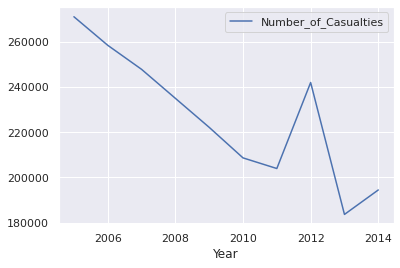

In [29]:
# plot Number_of_Casualties
allaccidents.groupby(['Year']).sum()['Number_of_Casualties'].to_frame().plot(kind='line')

In [30]:
#Casualties by year
year_wise_casualties = allaccidents.groupby(['Year'])['Number_of_Casualties'].sum()
year_wise_casualties = year_wise_casualties.reset_index()
year_wise_casualties

,Year,Number_of_Casualties
0,2005,271017
1,2006,258404
2,2007,247780
3,2009,222146
4,2010,208648
5,2011,203950
6,2012,241954
7,2013,183670
8,2014,194477


In [31]:
# Analysis on 2012
accidents_2012 = allaccidents[allaccidents['Year']==2012]

In [32]:
accidents_2012.shape

(179715, 34)

In [33]:
accidents_2012[accidents_2012.duplicated() == True]

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Hour,count
1087184,201201RG40561,0.032833,51.479580,1,3,2,2,20/09/2012,5,14:52,6,E09000011,4,210,Single carriageway,30,NaN,Giveway or uncontrolled,5,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01001595,2012,9,14.0,1
1087185,201201RG40562,0.091024,51.482873,1,3,2,2,01/10/2012,2,09:20,6,E09000011,5,0,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01001635,2012,10,9.0,1
1087186,201201RG40563,0.046158,51.455517,1,3,1,1,06/09/2012,5,08:50,6,E09000011,3,2,Single carriageway,50,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01001621,2012,9,8.0,1
1087187,201201RG40564,0.063571,51.493702,1,3,3,2,27/09/2012,5,07:46,6,E09000011,3,206,Dual carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01001707,2012,9,7.0,1
1087188,201201RG40565,0.023739,51.479108,1,3,2,1,26/09/2012,4,14:47,6,E09000011,4,210,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01001593,2012,9,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121323,2.01E+12,-1.426921,53.613610,13,2,2,1,28/04/2012,7,15:30,206,E08000036,4,6428,Single carriageway,60,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,E01011786,2012,4,15.0,1
1121324,2.01E+12,-1.488807,53.671057,13,3,2,1,28/04/2012,7,15:15,206,E08000036,3,61,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01011898,2012,4,15.0,1
1121325,2.01E+12,-1.749452,53.799519,13,3,2,2,28/04/2012,7,16:55,200,E08000032,5,6037,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01010823,2012,4,16.0,1
1121326,2.01E+12,-1.701745,53.718606,13,3,2,2,28/04/2012,7,17:56,203,E08000034,3,638,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Dry,None,None,1,Yes,E01011063,2012,4,17.0,1


In [34]:
accidents_2012E = accidents_2012[accidents_2012['Accident_Index'] == '2.01E+12']

In [35]:
accidents_2012 = accidents_2012[accidents_2012['Accident_Index'] != '2.01E+12']

In [36]:
len(accidents_2012)

113222

In [37]:
#dropping duplicates
dropped2012 = accidents_2012.drop_duplicates(subset = 'Accident_Index')

In [38]:
len(dropped2012)

90139

In [39]:
real2012 = pd.concat([accidents_2012E,dropped2012])

In [40]:
len(real2012)

156632

In [41]:
realdrop = accidents_2012.drop_duplicates()

In [42]:
len(realdrop)

90139

In [43]:
non2012 = allaccidents[allaccidents['Year'] != 2012]

In [44]:
realaccidents = pd.concat([realdrop,non2012])

In [45]:
len(realaccidents)

1414574

In [46]:
realaccidents.to_csv('allaccidents.csv', index=False)

In [47]:
allaccidents = pd.read_csv('allaccidents.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


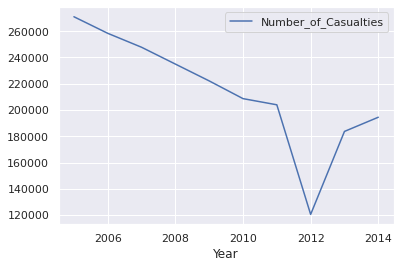

In [48]:
#reloaded
allaccidents.groupby(['Year']).sum()['Number_of_Casualties'].to_frame().plot(kind='line')

In [49]:

#lets see the numbers
year_wise_casualties = allaccidents.groupby(['Year'])['Number_of_Casualties'].sum()
year_wise_casualties = year_wise_casualties.reset_index()
year_wise_casualties

,Year,Number_of_Casualties
0,2005,271017
1,2006,258404
2,2007,247780
3,2009,222146
4,2010,208648
5,2011,203950
6,2012,120459
7,2013,183670
8,2014,194477


In [50]:
day_week_cas = allaccidents.groupby(['Day_of_Week']).agg({'Number_of_Casualties':['sum']})
day_week_cas = day_week_cas.sort_values([('Number_of_Casualties','sum')],ascending=False)
day_week_cas

,Number_of_Casualties
,sum
Day_of_Week,
6,312091
5,280789
4,279795
3,276893
7,268564
2,267023
1,225396


In [51]:
# Most Casualties on Friday

In [52]:
realaccidents=realaccidents.dropna(subset=['Longitude','Latitude'])

realaccidents=realaccidents.dropna(subset=['Time'])

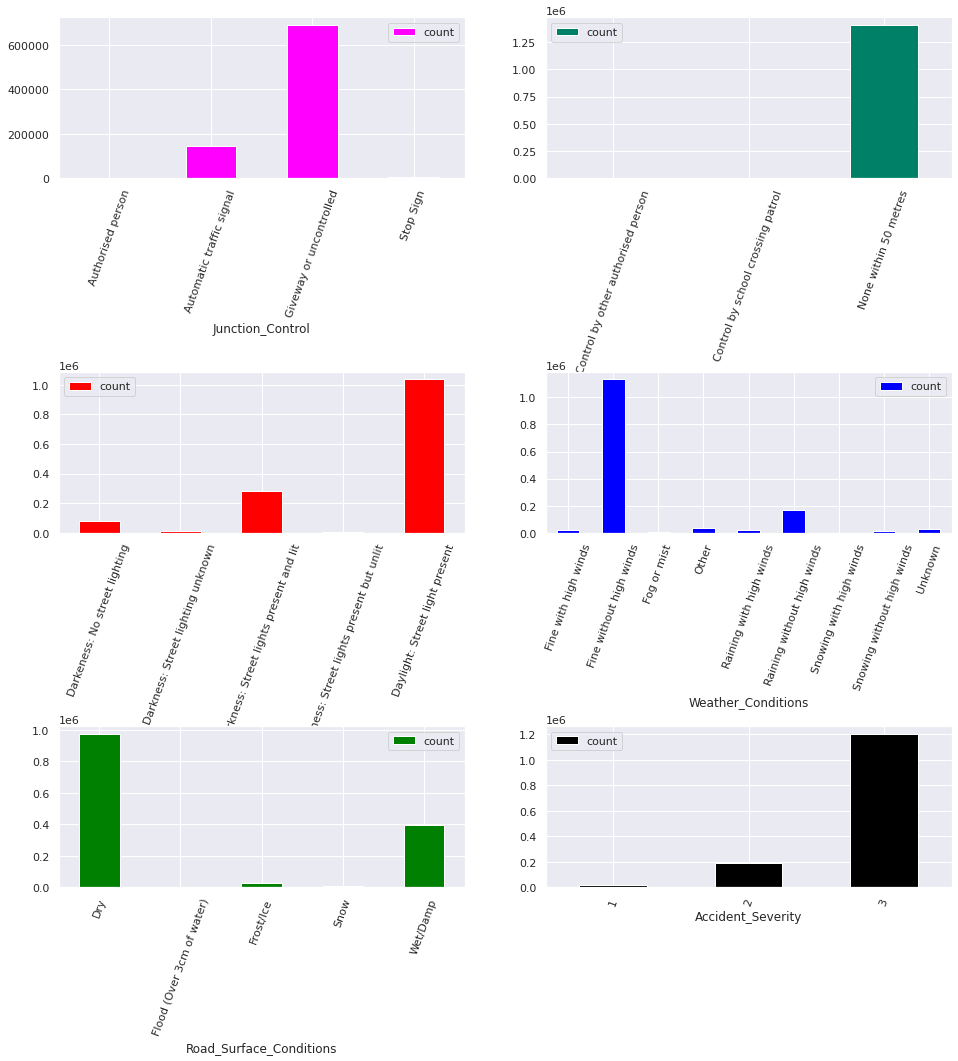

In [53]:
# counts accidents with some other features

f,ax = plt.subplots(3,2,figsize=(16,16))
f = allaccidents.groupby(['Junction_Control']).sum()['count'].to_frame().plot(kind='bar', cmap = 'spring', ax=ax[0,0], rot = 70)
f = allaccidents.groupby(['Pedestrian_Crossing-Human_Control']).sum()['count'].to_frame().plot(kind='bar', cmap = 'summer', ax=ax[0,1], rot = 70)
f = allaccidents.groupby(['Light_Conditions']).sum()['count'].to_frame().plot(kind='bar', cmap = 'autumn', ax=ax[1,0], rot = 70)
f = allaccidents.groupby(['Weather_Conditions']).sum()['count'].to_frame().plot(kind='bar', cmap = 'winter', ax=ax[1,1], rot = 70)
f = allaccidents.groupby(['Road_Surface_Conditions']).sum()['count'].to_frame().plot(kind='bar', cmap = 'ocean', ax=ax[2,0], rot = 70)
f = allaccidents.groupby(['Accident_Severity']).sum()['count'].to_frame().plot(kind='bar', cmap = 'copper', ax=ax[2,1], rot = 70)
plt.subplots_adjust( hspace = 1.2 )

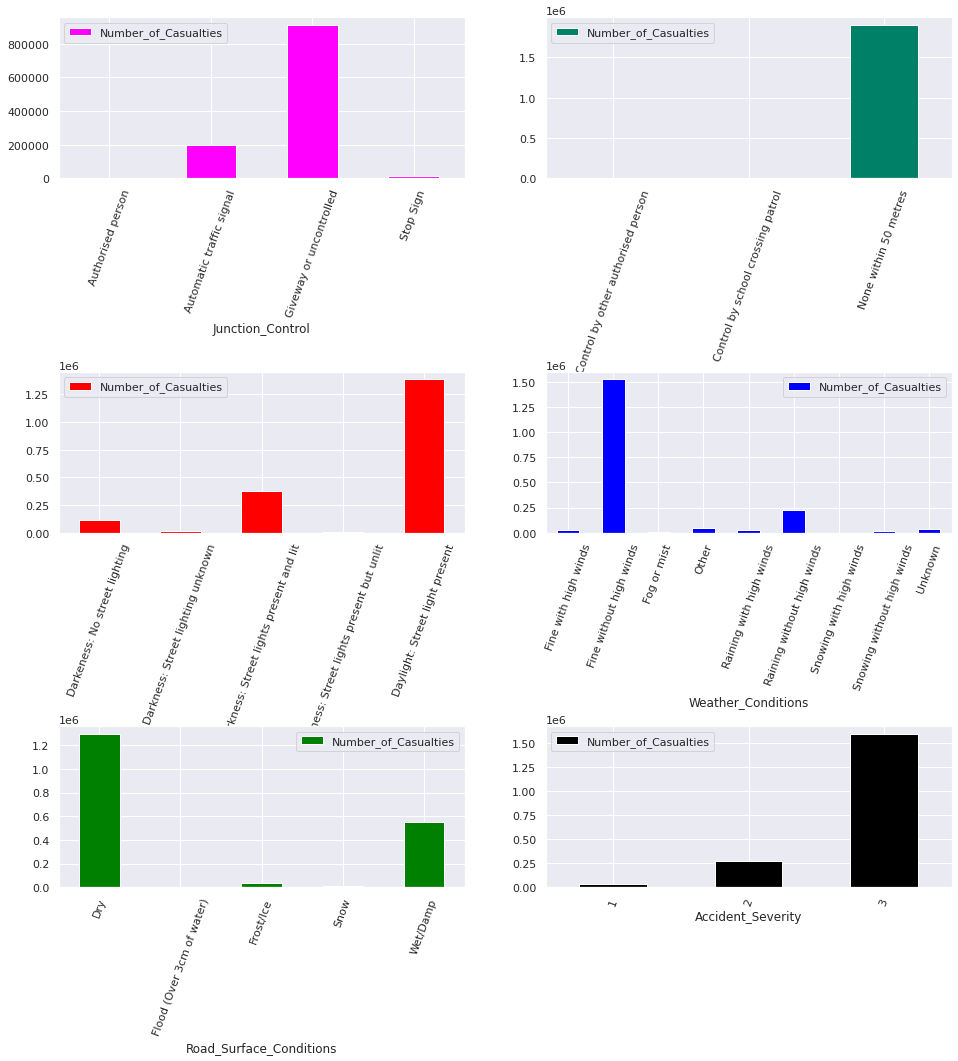

In [54]:
# counts casualty on some other features

f,ax = plt.subplots(3,2,figsize=(16,16))
f = allaccidents.groupby(['Junction_Control']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'spring', ax=ax[0,0], rot = 70)
f = allaccidents.groupby(['Pedestrian_Crossing-Human_Control']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'summer', ax=ax[0,1], rot = 70)
f = allaccidents.groupby(['Light_Conditions']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'autumn', ax=ax[1,0], rot = 70)
f = allaccidents.groupby(['Weather_Conditions']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'winter', ax=ax[1,1], rot = 70)
f = allaccidents.groupby(['Road_Surface_Conditions']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'ocean', ax=ax[2,0], rot = 70)
f = allaccidents.groupby(['Accident_Severity']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'copper', ax=ax[2,1], rot = 70)
plt.subplots_adjust( hspace = 1.2 )

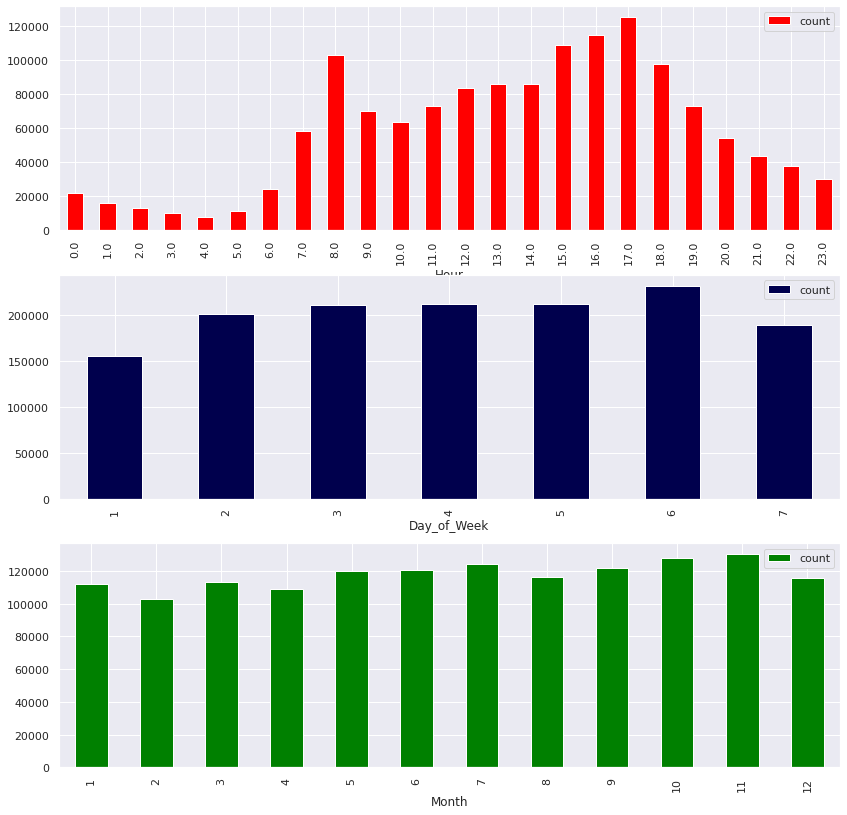

In [55]:
# accident counts on time

f,ax = plt.subplots(3,1,figsize=(14,14))

f = allaccidents.groupby(['Hour']).sum()['count'].to_frame().plot(ax=ax[0],cmap='autumn', kind='bar')
f = allaccidents.groupby(['Day_of_Week']).sum()['count'].to_frame().plot(ax=ax[1],cmap='seismic',kind='bar')
f = allaccidents.groupby(['Month',]).sum()['count'].to_frame().plot(ax=ax[2],cmap='ocean',kind='bar')

In [56]:
area_wise = allaccidents.groupby(['Local_Authority_(District)'])['Number_of_Casualties'].size()
area_wise = area_wise.sort_values(ascending=False)
area_wise = area_wise.reset_index()
area_wise = area_wise.head(10)
area_wise

,Local_Authority_(District),Number_of_Casualties
0,300,27675
1,204,17453
2,102,13866
3,1,13559
4,926,13355
5,91,12724
6,215,12522
7,200,11870
8,923,10151
9,9,10086


In [57]:
# converting into numner (like label encoding)

road_dict = {'Roundabout':1, 'One way street':2, 'Dual carriageway':3, 'Single carriageway':6,
            'Slip road':7, 'Unknown':9, 'One way street/Slip road':12, 'Data missing or out of range':-1}

In [58]:
allaccidents['Road_Type'].replace(road_dict, inplace = True)

In [59]:
allaccidents.drop(['Junction_Detail','Junction_Control'], axis = 1, inplace = True)

In [60]:
allaccidents.isnull().sum()

Accident_Index                                      0
Longitude                                         101
Latitude                                          101
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              112
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
2nd_Road_Class                                      0
2nd_Road_Number                                     0
Pedestrian_Crossing-Human_Co

In [61]:
ped_cross_dict = {'None within 50 metres':0, 'Control by school crossing patrol':1,
                  'Control by other authorised person':2}

In [62]:
allaccidents['Pedestrian_Crossing-Human_Control'].replace(ped_cross_dict, inplace = True)

In [63]:
ped_fac_dict = {'No physical crossing within 50 meters':0, 'Zebra crossing':1, 
                'non-junction pedestrian crossing':4,
               'Pedestrian phase at traffic signal junction':5, 'Footbridge or subway':7,
               'Central refuge':8, 'Data missing or out of range':-1}

In [64]:
allaccidents['Pedestrian_Crossing-Physical_Facilities'].replace(ped_fac_dict, inplace = True)

In [65]:
light_dict = {'Daylight: Street light present':1, 'Darkness: Street lights present and lit':4,
              'Darkness: Street lights present but unlit':5, 'Darkeness: No street lighting':6, 
              'Darkness: Street lighting unknown':7}

In [66]:
allaccidents['Light_Conditions'].replace(light_dict, inplace = True)

In [67]:
weather_dict = {'Fine without high winds':1, 'Raining without high winds':2, 'Other':8, 'Unknown':9,
               'Raining with high winds':5, 'Fine with high winds':4, 'Snowing without high winds':3,
               'Fog or mist':7, 'Snowing with high winds':6, 'Data missing or out of range':-1}

In [68]:
allaccidents['Weather_Conditions'].replace(weather_dict, inplace = True)

In [69]:
road_condition_dict = {'Dry':1, 'Wet/Damp':2, 'Snow':3, 'Frost/Ice':4, 'Flood (Over 3cm of water)':5}

In [70]:
allaccidents['Road_Surface_Conditions'].replace(road_condition_dict, inplace = True)

In [71]:
special_condition_dict = {'None':0, 'Auto traffic singal out':1, 'Roadworks':4, 'Ol or diesel':6,
                         'Mud':7, 'Road surface defective': 5, 'Permanent sign or marking defective or obscured': 3,
                         'Auto traffic signal partly defective':2}

In [72]:
allaccidents['Special_Conditions_at_Site'].replace(special_condition_dict, inplace = True)

In [73]:
carr_hazard_dict = {'None':0, 'Other object in carriageway':2, 'Any animal (except a ridden horse)':7,
                   'Pedestrian in carriageway (not injured)':6, 'Involvement with previous accident':3,
                   'Dislodged vehicle load in carriageway':1}

In [74]:
allaccidents['Carriageway_Hazards'].replace(carr_hazard_dict, inplace = True)

In [75]:
police_dict = {'Yes':1, 'No':0}

In [76]:
allaccidents['Did_Police_Officer_Attend_Scene_of_Accident'].replace(police_dict, inplace = True)

In [77]:
allaccidents.fillna(-1, inplace = True)

In [78]:
allaccidents.head(2)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Hour,count
0,201201BS70001,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,3,308,6,30,5,0,0.0,5.0,4,1.0,1.0,0.0,0.0,1,1.0,E01002821,2012,1,20.0,1
1,201201BS70002,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,4,412,6,30,6,0,0.0,0.0,4,1.0,1.0,0.0,0.0,1,1.0,E01004760,2012,1,17.0,1


In [79]:
len(allaccidents)

1414574

In [80]:
allaccidents.to_csv('numeric_accidents.csv', index=False)

In [81]:
numeric = pd.read_csv('numeric_accidents.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
numeric =  numeric.drop(['Accident_Index','Local_Authority_(Highway)','LSOA_of_Accident_Location','Date','Time'], axis = 1)

In [83]:
numeric.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Month,Hour,count
0,-0.169101,51.493429,1,3,2,1,5,12,3,308,6,30,5,0,0.0,5.0,4,1.0,1.0,0.0,0.0,1,1.0,2012,1,20.0,1
1,-0.200838,51.517931,1,3,2,1,4,1,4,412,6,30,6,0,0.0,0.0,4,1.0,1.0,0.0,0.0,1,1.0,2012,1,17.0,1
2,-0.188636,51.487618,1,3,2,1,3,12,3,3220,2,30,6,0,0.0,4.0,1,1.0,1.0,0.0,0.0,1,1.0,2012,1,10.0,1
3,-0.200259,51.514325,1,3,1,1,4,12,5,0,6,30,6,0,0.0,0.0,1,1.0,1.0,0.0,0.0,1,1.0,2012,1,12.0,1
4,-0.183773,51.497614,1,3,1,1,3,12,4,325,6,30,6,0,0.0,0.0,4,1.0,1.0,0.0,0.0,1,1.0,2012,1,20.0,1


In [84]:
#sns.pairplot(numeric[:10])

In [85]:
accidents = pd.read_csv('allaccidents.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [86]:
accidents.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Hour,count
0,201201BS70001,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,3,308,Single carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012,1,20.0,1
1,201201BS70002,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,4,412,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012,1,17.0,1
2,201201BS70003,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12,E09000020,3,3220,One way street,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012,1,10.0,1
3,201201BS70004,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12,E09000020,5,0,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012,1,12.0,1
4,201201BS70005,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12,E09000020,4,325,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012,1,20.0,1


In [87]:
# convert distirct numaric to text
district = pd.DataFrame(accidents['Local_Authority_(District)'])

In [88]:
district.head()

,Local_Authority_(District)
0,12
1,1
2,12
3,12
4,12


In [89]:
distdict = {1:'Westminster',
2:'Camden',
3:'Islington',
4:'Hackney',
5:'Tower_Hamlets',
6:'Greenwich',
7:'Lewisham',
8:'Southwark',
9:'Lambeth',
10:'Wandsworth',
11:'Hammersmith_and_Fulham',
12:'Kensington_and_Chelsea',
13:'Waltham_Forest',
14:'Redbridge',
15:'Havering',
16:'Barking_and_Dagenham',
17:'Newham',
18:'Bexley',
19:'Bromley',
20:'Croydon',
21:'Sutton',
22:'Merton',
23:'Kingston_upon_Thames',
24:'Richmond_upon_Thames',
25:'Hounslow',
26:'Hillingdon',
27:'Ealing',
28:'Brent',
29:'Harrow',
30:'Barnet',
31:'Haringey',
32:'Enfield',
33:'Hertsmere',
38:'Epsom_and_Ewell',
40:'Spelthorne',
57:'London_Airport_(Heathrow)',
60:'Allerdale',
61:'Barrow_in_Furness',
62:'Carlisle',
63:'Copeland',
64:'Eden',
65:'South_Lakeland',
70:'Blackburn_with_Darwen',
71:'Blackpool',
72:'Burnley',
73:'Chorley',
74:'Fylde',
75:'Hyndburn',
76:'Lancaster',
77:'Pendle',
79:'Preston',
80:'Ribble_Valley',
82:'Rossendale',
83:'South_Ribble',
84:'West_Lancashire',
85:'Wyre',
90:'Knowsley',
91:'Liverpool',
92:'St._Helens',
93:'Sefton',
95:'Wirral',
100:'Bolton',
101:'Bury',
102:'Manchester',
104:'Oldham',
106:'Rochdale',
107:'Salford',
109:'Stockport',
110:'Tameside',
112:'Trafford',
114:'Wigan',
120:'Chester',
121:'Congleton',
122:'Crewe_and_Nantwich',
123:'Ellesmere_Port_and_Neston',
124:'Halton',
126:'Macclesfield',
127:'Vale_Royal',
128:'Warrington',
129:'Cheshire_East',
130:'Cheshire_West_and_Chester',
139:'Northumberland',
140:'Alnwick',
141:'Berwick_upon_Tweed',
142:'Blyth_Valley',
143:'Castle_Morpeth',
144:'Tynedale',
145:'Wansbeck',
146:'Gateshead',
147:'Newcastle_upon_Tyne',
148:'North_Tyneside',
149:'South_Tyneside',
150:'Sunderland',
160:'Chester_le_Street',
161:'Darlington',
162:'Derwentside',
163:'Durham',
164:'Easington',
165:'Sedgefield',
166:'Teesdale',
168:'Wear_Valley',
169:'County_Durham',
180:'Craven',
181:'Hambleton',
182:'Harrogate',
184:'Richmondshire',
185:'Ryedale',
186:'Scarborough',
187:'Selby',
189:'York',
200:'Bradford',
202:'Calderdale',
203:'Kirklees',
204:'Leeds',
206:'Wakefield',
210:'Barnsley',
211:'Doncaster',
213:'Rotherham',
215:'Sheffield',
228:'Kingston_upon_Hull,_City_of',
231:'East_Riding_of_Yorkshire',
232:'North_Lincolnshire',
233:'North_East_Lincolnshire',
240:'Hartlepool',
241:'Redcar_and_Cleveland',
243:'Middlesbrough',
245:'Stockton_on_Tees',
250:'Cannock_Chase',
251:'East_Staffordshire',
252:'Lichfield',
253:'Newcastle_under_Lyme',
254:'South_Staffordshire',
255:'Stafford',
256:'Staffordshire_Moorlands',
257:'Stoke_on_Trent',
258:'Tamworth',
270:'Bromsgrove',
273:'Malvern_Hills',
274:'Redditch',
276:'Worcester',
277:'Wychavon',
278:'Wyre_Forest',
279:'Bridgnorth',
280:'North_Shropshire',
281:'Oswestry',
282:'Shrewsbury_and_Atcham',
283:'South_Shropshire',
284:'Telford_and_Wrekin',
285:'Herefordshire,_County_of_',
286:'Shropshire',
290:'North_Warwickshire',
291:'Nuneaton_and_Bedworth',
292:'Rugby_',
293:'Stratford_upon_Avon',
294:'Warwick',
300:'Birmingham',
302:'Coventry',
303:'Dudley',
305:'Sandwell',
306:'Solihull',
307:'Walsall',
309:'Wolverhampton',
320:'Amber_Valley',
321:'Bolsover',
322:'Chesterfield',
323:'Derby',
324:'Erewash',
325:'High_Peak',
327:'North_East_Derbyshire',
328:'South_Derbyshire',
329:'Derbyshire_Dales',
340:'Ashfield',
341:'Bassetlaw',
342:'Broxtowe',
343:'Gedling',
344:'Mansfield',
345:'Newark_and_Sherwood',
346:'Nottingham',
347:'Rushcliffe',
350:'Boston',
351:'East_Lindsey',
352:'Lincoln',
353:'North_Kesteven',
354:'South_Holland',
355:'South_Kesteven',
356:'West_Lindsey',
360:'Blaby',
361:'Hinckley_and_Bosworth',
362:'Charnwood',
363:'Harborough',
364:'Leicester',
365:'Melton',
366:'North_West_Leicestershire',
367:'Oadby_and_Wigston',
368:'Rutland',
380:'Corby',
381:'Daventry',
382:'East_Northamptonshire',
383:'Kettering',
384:'Northampton',
385:'South_Northamptonshire',
386:'Wellingborough',
390:'Cambridge',
391:'East_Cambridgeshire',
392:'Fenland',
393:'Huntingdonshire',
394:'Peterborough',
395:'South_Cambridgeshire',
400:'Breckland',
401:'Broadland',
402:'Great_Yarmouth',
404:'Norwich',
405:'North_Norfolk',
406:'South_Norfolk',
407:'Kings_Lynn_and_West_Norfolk',
410:'Babergh',
411:'Forest_Heath',
412:'Ipswich',
413:'Mid_Suffolk',
414:'St._Edmundsbury',
415:'Suffolk_Coastal',
416:'Waveney',
420:'Bedford',
421:'Luton',
422:'Mid_Bedfordshire',
423:'South_Bedfordshire',
424:'Central_Bedfordshire',
430:'Broxbourne',
431:'Dacorum',
432:'East_Hertfordshire',
433:'North_Hertfordshire',
434:'St._Albans',
435:'Stevenage',
436:'Three_Rivers',
437:'Watford',
438:'Welwyn_Hatfield',
450:'Basildon',
451:'Braintree',
452:'Brentwood',
453:'Castle_Point',
454:'Chelmsford',
455:'Colchester',
456:'Epping_Forest',
457:'Harlow',
458:'Maldon',
459:'Rochford',
460:'Southend_on_Sea',
461:'Tendring',
462:'Thurrock',
463:'Uttlesford',
470:'Bracknell_Forest',
471:'West_Berkshire',
472:'Reading',
473:'Slough',
474:'Windsor_and_Maidenhead',
475:'Wokingham',
476:'Aylesbury_Vale',
477:'South_Bucks',
478:'Chiltern',
479:'Milton_Keynes',
480:'Wycombe',
481:'Cherwell',
482:'Oxford',
483:'Vale_of_White_Horse',
484:'South_Oxfordshire',
485:'West_Oxfordshire',
490:'Basingstoke_and_Deane',
491:'Eastleigh',
492:'Fareham',
493:'Gosport',
494:'Hart',
495:'Havant',
496:'New_Forest',
497:'East_Hampshire',
498:'Portsmouth',
499:'Rushmoor',
500:'Southampton_',
501:'Test_Valley',
502:'Winchester',
505:'Isle_of_Wight',
510:'Elmbridge',
511:'Guildford',
512:'Mole_Valley',
513:'Reigate_and_Banstead',
514:'Runnymede',
515:'Surrey_Heath',
516:'Tandridge',
517:'Waverley',
518:'Woking',
530:'Ashford',
531:'Canterbury',
532:'Dartford',
533:'Dover',
535:'Gravesham',
536:'Maidstone',
538:'Sevenoaks',
539:'Shepway',
540:'Swale',
541:'Thanet',
542:'Tonbridge_and_Malling',
543:'Tunbridge_Wells',
544:'Medway',
551:'Eastbourne',
552:'Hastings',
554:'Lewes',
555:'Rother',
556:'Wealden',
557:'Adur',
558:'Arun',
559:'Chichester',
560:'Crawley',
562:'Horsham',
563:'Mid_Sussex',
564:'Worthing',
565:'Brighton_and_Hove',
570:'City_of_London',
580:'East_Devon',
581:'Exeter',
582:'North_Devon',
583:'Plymouth',
584:'South_Hams',
585:'Teignbridge',
586:'Mid_Devon',
587:'Torbay',
588:'Torridge',
589:'West_Devon',
590:'Caradon',
591:'Carrick',
592:'Kerrier',
593:'North_Cornwall',
594:'Penwith',
595:'Restormel',
596:'Cornwall',
601:'Bristol,_City_of',
605:'North_Somerset',
606:'Mendip',
607:'Sedgemoor',
608:'Taunton_Deane',
609:'West_Somerset',
610:'South_Somerset',
611:'Bath_and_North_East_Somerset',
612:'South_Gloucestershire',
620:'Cheltenham',
621:'Cotswold',
622:'Forest_of_Dean',
623:'Gloucester',
624:'Stroud',
625:'Tewkesbury',
630:'Kennet',
631:'North_Wiltshire',
632:'Salisbury',
633:'Swindon',
634:'West_Wiltshire',
635:'Wiltshire',
640:'Bournemouth',
641:'Christchurch',
642:'North_Dorset',
643:'Poole',
644:'Purbeck',
645:'West_Dorset',
646:'Weymouth_and_Portland',
647:'East_Dorset',
720:'Isle_of_Anglesey',
721:'Conwy',
722:'Gwynedd',
723:'Denbighshire',
724:'Flintshire',
725:'Wrexham',
730:'Blaenau_Gwent',
731:'Caerphilly',
732:'Monmouthshire',
733:'Newport',
734:'Torfaen',
740:'Bridgend',
741:'Cardiff',
742:'Merthyr_Tydfil',
743:'Neath_Port_Talbot',
744:'Rhondda,_Cynon,_Taff',
745:'Swansea',
746:'The_Vale_of_Glamorgan',
750:'Ceredigion',
751:'Carmarthenshire',
752:'Pembrokeshire',
753:'Powys',
910:'Aberdeen_City',
911:'Aberdeenshire',
912:'Angus',
913:'Argyll_and_Bute',
914:'Scottish_Borders',
915:'Clackmannanshire',
916:'West_Dunbartonshire',
917:'Dumfries_and_Galloway',
918:'Dundee_City',
919:'East_Ayrshire',
920:'East_Dunbartonshire',
921:'East_Lothian',
922:'East_Renfrewshire',
923:'Edinburgh,_City_of',
924:'Falkirk',
925:'Fife',
926:'Glasgow_City',
927:'Highland',
928:'Inverclyde',
929:'Midlothian',
930:'Moray',
931:'North_Ayrshire',
932:'North_Lanarkshire',
933:'Orkney_Islands',
934:'Perth_and_Kinross',
935:'Renfrewshire',
936:'Shetland_Islands',
937:'South_Ayrshire',
938:'South_Lanarkshire',
939:'Stirling',
940:'West_Lothian',
941:'Western_Isles'}

In [90]:
district['District_Name'] = district['Local_Authority_(District)'].copy()

In [91]:
district.head()

,Local_Authority_(District),District_Name
0,12,12
1,1,1
2,12,12
3,12,12
4,12,12


In [92]:
district['District_Name'].replace(distdict, inplace=True)

In [93]:
district.head()

,Local_Authority_(District),District_Name
0,12,Kensington_and_Chelsea
1,1,Westminster
2,12,Kensington_and_Chelsea
3,12,Kensington_and_Chelsea
4,12,Kensington_and_Chelsea


In [94]:
accidents['District_Name'] = district['District_Name']

In [95]:
accidents.to_csv('allaccidents.csv', index = False)

In [ ]:
# Model

In [97]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import time
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

In [98]:
accidents = pd.read_csv('numeric_accidents.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
accidents.head(2)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Hour,count
0,201201BS70001,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,3,308,6,30,5,0,0.0,5.0,4,1.0,1.0,0.0,0.0,1,1.0,E01002821,2012,1,20.0,1
1,201201BS70002,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,4,412,6,30,6,0,0.0,0.0,4,1.0,1.0,0.0,0.0,1,1.0,E01004760,2012,1,17.0,1


In [100]:
birmingham = accidents[accidents['Local_Authority_(District)'] == 300]

In [101]:
birmingham[birmingham['Date']=='02/02/2012']

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Hour,count
46907,201220T006652,-1.881866,52.429232,20,3,2,2,02/02/2012,5,15:30,300,E08000025,3,4040,1,30,6,0,0.0,0.0,1,1.0,1.0,0.0,0.0,1,1.0,E01008932,2012,2,15.0,1
47543,201220W008182,-1.856415,52.476672,20,3,1,1,02/02/2012,5,13:40,300,E08000025,4,4128,6,30,4,4145,0.0,5.0,1,9.0,1.0,0.0,0.0,1,0.0,E01009198,2012,2,13.0,1


In [102]:
birmingham['Weather_Conditions'].value_counts()

1.0    20690
2.0     3514
8.0     1520
9.0     1092
5.0      288
4.0      288
3.0      198
7.0       68
6.0       17
Name: Weather_Conditions, dtype: int64

In [103]:
birmingham = birmingham.drop(['Accident_Index','Longitude','Latitude','Police_Force','Local_Authority_(Highway)',
            '1st_Road_Class','1st_Road_Number','2nd_Road_Class',
            '2nd_Road_Number','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities',
            'Special_Conditions_at_Site','Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
            'LSOA_of_Accident_Location', 'Accident_Severity','Number_of_Vehicles','Number_of_Casualties',
            'Road_Type','Urban_or_Rural_Area','count'], axis = 1)

In [104]:
birminghamtime = birmingham.groupby(['Date']).count().reset_index()

In [105]:
birminghamtime.head()

,Date,Day_of_Week,Time,Local_Authority_(District),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year,Month,Hour
0,01/01/2005,8,8,8,8,8,8,8,8,8,8
1,01/01/2006,8,8,8,8,8,8,8,8,8,8
2,01/01/2007,13,13,13,13,13,13,13,13,13,13
3,01/01/2009,8,8,8,8,8,8,8,8,8,8
4,01/01/2010,9,9,9,9,9,9,9,9,9,9


In [106]:
birminghamtime = birminghamtime[['Date','Day_of_Week']]
birminghamtime = birminghamtime.rename({'Day_of_Week':'Number_of_Accidents'}, axis = 1)

In [107]:
birminghamtime['Date'] = pd.to_datetime(birminghamtime['Date'])

birminghamtime = birminghamtime.sort_values(by='Date')

birminghamts = birminghamtime.set_index('Date')

In [108]:

birminghamts

,Number_of_Accidents
Date,
2005-01-01,8
2005-01-02,16
2005-01-03,12
2005-01-04,3
2005-01-05,12
...,...
2014-12-27,5
2014-12-28,6
2014-12-29,5


In [109]:
birminghamts.describe()

,Number_of_Accidents
count,3278.000000
mean,8.442648
std,3.815181
min,1.000000
25%,6.000000
50%,8.000000
75%,11.000000
max,27.000000


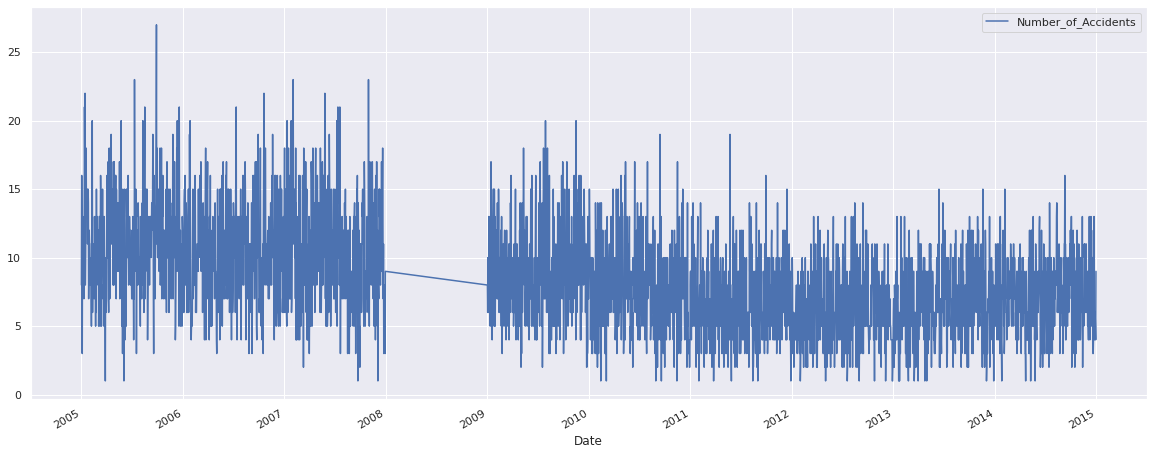

In [110]:
#The dataset was missing data from 2008, so we'll be creating a time series from 2009 onward.
birminghamts.plot(figsize = (20,8))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc535241f50>]],
      dtype=object)

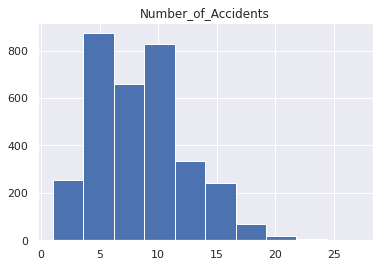

In [111]:
birminghamts.hist()

In [112]:
birminghamts9 = birminghamts['2009':'2014']

In [113]:
birminghamts9

,Number_of_Accidents
Date,
2009-01-01,8
2009-01-02,6
2009-01-03,10
2009-01-04,7
2009-01-05,6
...,...
2014-12-27,5
2014-12-28,6
2014-12-29,5


In [114]:
#some days are missing from this dataframe because there were no accidents on some days.
birminghamts9[360:365]

,Number_of_Accidents
Date,
2009-12-29,13
2009-12-30,7
2009-12-31,7
2010-01-01,9
2010-01-02,12


In [115]:
# missing date resolution

reset = birminghamts9.reset_index()

In [116]:
reset.head()

,Date,Number_of_Accidents
0,2009-01-01,8
1,2009-01-02,6
2,2009-01-03,10
3,2009-01-04,7
4,2009-01-05,6


In [117]:

reset.loc[363]

Date                   2010-01-01 00:00:00
Number_of_Accidents                      9
Name: 363, dtype: object

In [118]:

prev_date = reset.Date[0]
fill = []
for i, row in reset.iterrows():
    if row.Date != prev_date + datetime.timedelta(days=1):
        print(row.Date)
        fill.append(row.Date - datetime.timedelta(days=1))
    prev_date = row.Date

2009-01-01 00:00:00
2009-03-03 00:00:00
2009-07-27 00:00:00
2011-01-28 00:00:00
2012-04-12 00:00:00
2012-06-18 00:00:00
2013-09-07 00:00:00
2014-05-31 00:00:00
2014-11-30 00:00:00


In [119]:
fill

[Timestamp('2008-12-31 00:00:00'),
 Timestamp('2009-03-02 00:00:00'),
 Timestamp('2009-07-26 00:00:00'),
 Timestamp('2011-01-27 00:00:00'),
 Timestamp('2012-04-11 00:00:00'),
 Timestamp('2012-06-17 00:00:00'),
 Timestamp('2013-09-06 00:00:00'),
 Timestamp('2014-05-30 00:00:00'),
 Timestamp('2014-11-29 00:00:00')]

In [120]:
filldf = pd.DataFrame(fill)
filldf['Number_of_Accidents'] = 0

filldf = filldf.rename({0:'Date'}, axis = 1)

filldf = filldf.drop(index=0)

In [121]:
reset2 = reset.append(filldf)

In [122]:
reset2 = reset2.sort_values('Date')

In [123]:
birminghamts9 = reset2.set_index('Date')

In [124]:
len(birminghamts9)   

2191

In [125]:
#series
accident_series = pd.Series(birminghamts9['Number_of_Accidents'])

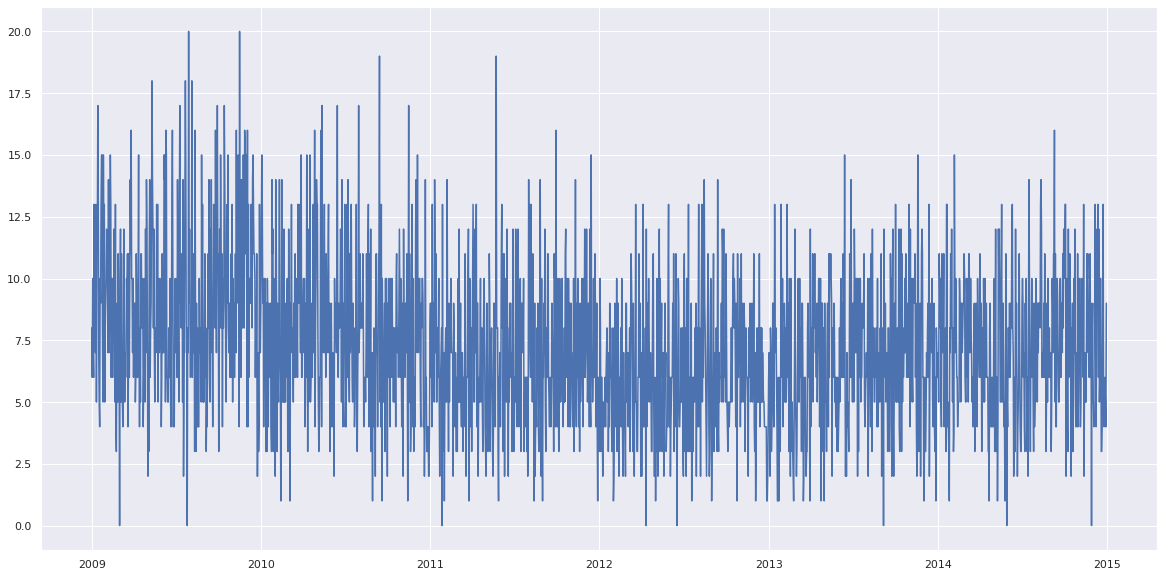

In [126]:
plt.figure(figsize = (20,10))
plt.plot(accident_series)

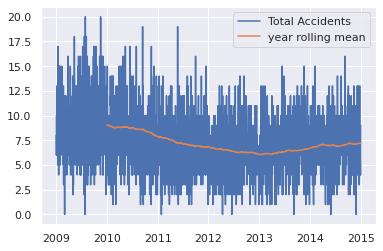

In [127]:
rolling_mean = accident_series.rolling(window=365).mean()

plt.plot(accident_series)
plt.plot(rolling_mean)
plt.legend(['Total Accidents','year rolling mean'])

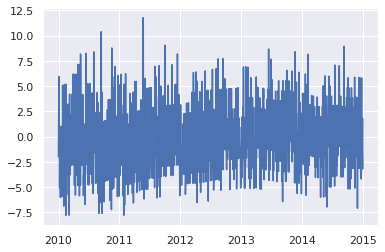

In [128]:
#De-trending the series
detrended_series = (accident_series) - (rolling_mean).dropna()
plt.plot(detrended_series)

In [129]:

result = adfuller(accident_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.793784
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


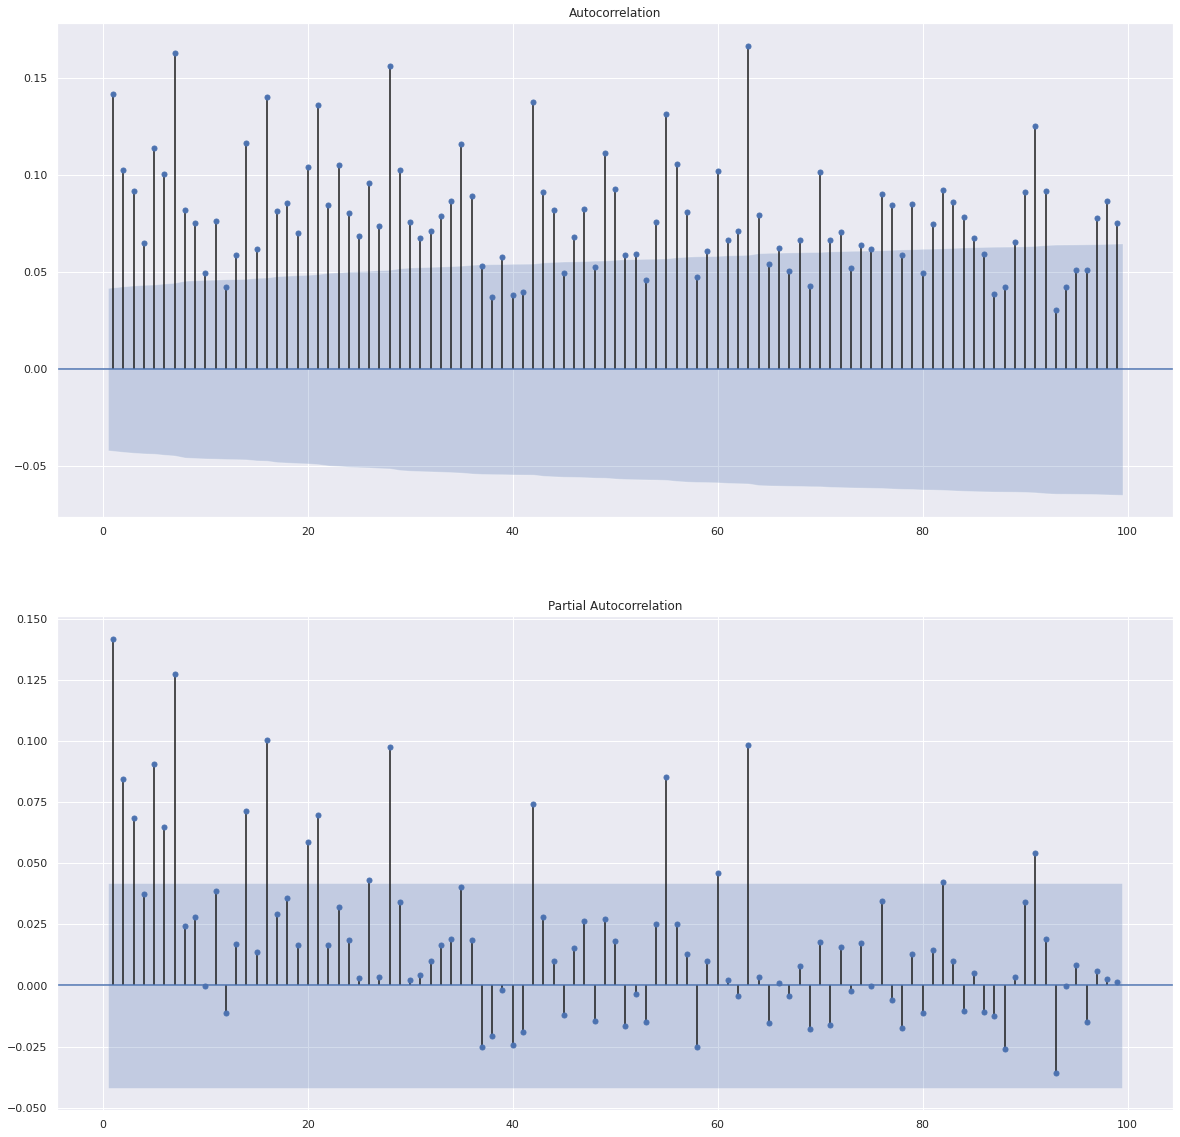

In [130]:

#ACF and PACF plots to get p,q values
plt.figure(figsize = (20,20))
plt.subplot(211)
plot_acf(accident_series, ax=plt.gca(), lags = np.arange(1,100))
plt.subplot(212)
plot_pacf(accident_series, ax=plt.gca(), lags = np.arange(1,100))
plt.show()

In [131]:

def difference(dataset, interval = 1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [132]:
stationary = difference(accident_series)

stationary.index = accident_series.index[1:]


In [133]:

result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.512304
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


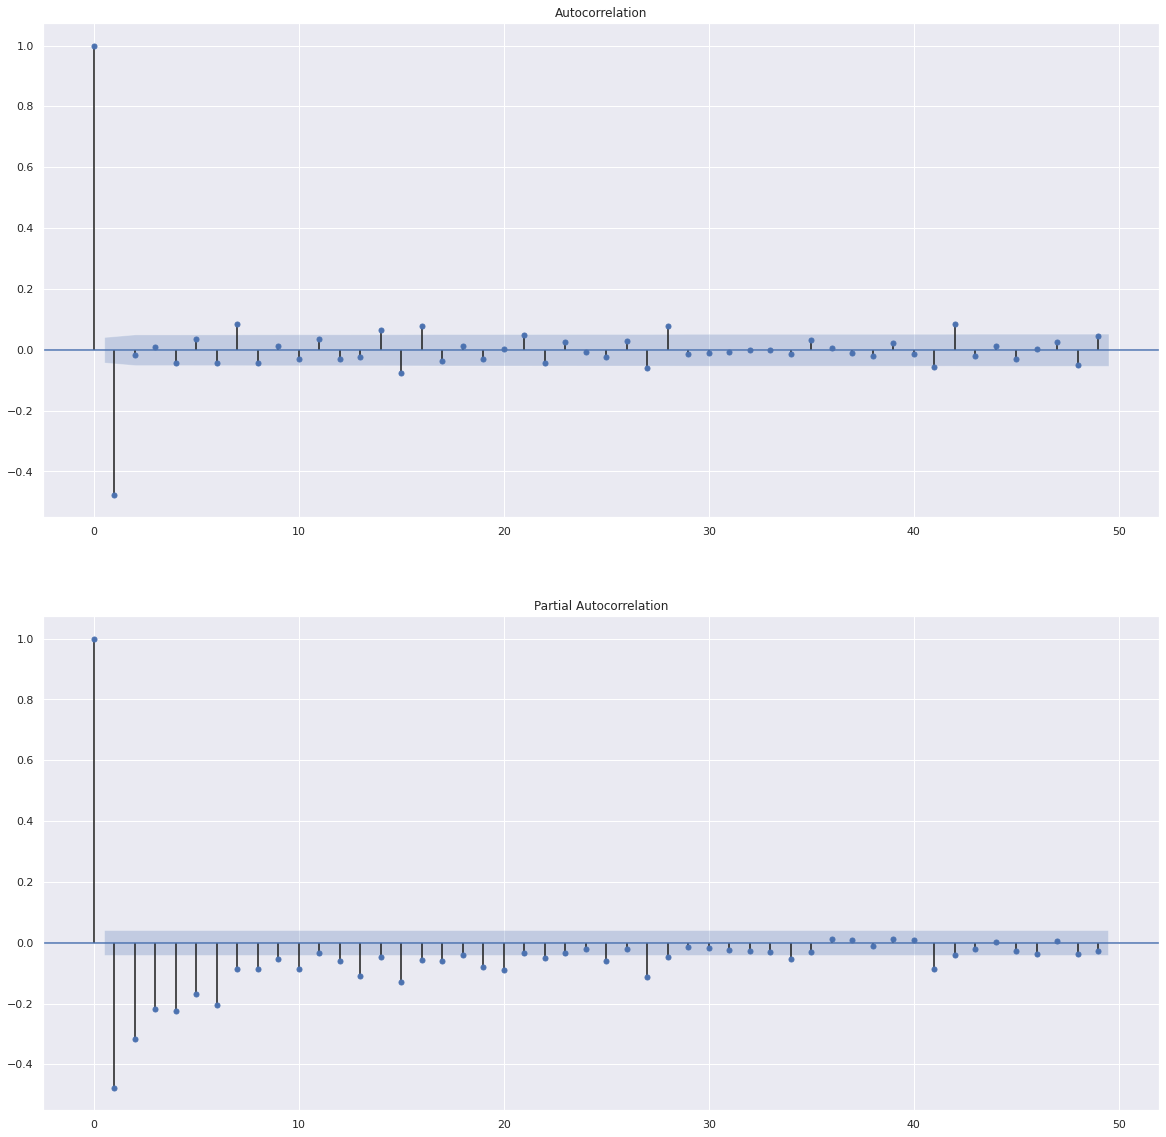

In [134]:
#diff
plt.figure(figsize = (20,20))
plt.subplot(211)
plot_acf(stationary, ax=plt.gca(), lags = np.arange(0,50))
plt.subplot(212)
plot_pacf(stationary, ax=plt.gca(), lags = np.arange(0,50))
plt.show()

In [135]:
(2,1,0)

(2, 1, 0)

In [136]:
stationary = stationary.astype('float')

In [137]:

accident_series = accident_series.astype('float')

In [138]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

RMSE: 3.764


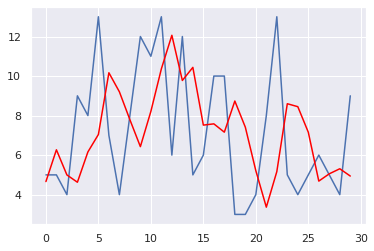

In [140]:
X = accident_series.values
train, test = X[0:(len(X)-30)], X[(len(X)-30):len(X)]
history = [x for x in train]
predictions = []
for i in range(len(test)):
    model = ARIMA(history, order = (2,1,0))
    model_fit = model.fit(disp = 0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    #print('>Predicted=%3.f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [141]:

r2_score(test,predictions)

-0.39216788360286103

In [ ]:
#time series not working as expected.  will check with facebook's Prophet now

In [142]:
from fbprophet import Prophet

In [143]:
accident_series

Date
2009-01-01     8.0
2009-01-02     6.0
2009-01-03    10.0
2009-01-04     7.0
2009-01-05     6.0
              ... 
2014-12-27     5.0
2014-12-28     6.0
2014-12-29     5.0
2014-12-30     4.0
2014-12-31     9.0
Name: Number_of_Accidents, Length: 2191, dtype: float64

In [144]:
reset = accident_series.reset_index()

In [145]:
reset.columns = ['ds','y']

In [146]:
reset.head()

,ds,y
0,2009-01-01,8.0
1,2009-01-02,6.0
2,2009-01-03,10.0
3,2009-01-04,7.0
4,2009-01-05,6.0


In [147]:
promodel = Prophet()
promodel.fit(reset[0:(len(reset) - 30)])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [148]:
future_python = promodel.make_future_dataframe(periods=30)

In [149]:
forecast_python = promodel.predict(future_python)

In [151]:
forecast_python.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-01,9.439044,4.812877,12.490964,9.439044,9.439044,-0.762020,-0.762020,-0.762020,0.126431,0.126431,0.126431,-0.888451,-0.888451,-0.888451,0.0,0.0,0.0,8.677024
1,2009-01-02,9.436211,5.030451,12.574666,9.436211,9.436211,-0.568689,-0.568689,-0.568689,0.288358,0.288358,0.288358,-0.857047,-0.857047,-0.857047,0.0,0.0,0.0,8.867523


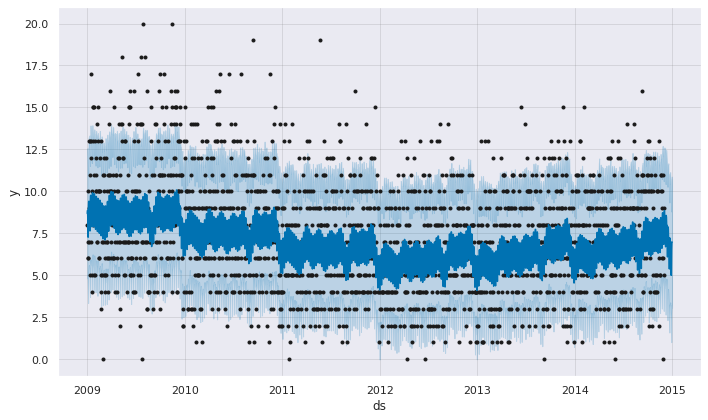

In [152]:

fig = promodel.plot(forecast_python)

In [153]:
predict = list(forecast_python['yhat'][(len(forecast_python)-30):len(forecast_python)])

In [154]:
rmse = np.sqrt(mean_squared_error(np.array(reset['y'][(len(reset)-30):len(reset)]), 
                         np.array(predict)))

In [155]:
rmse

3.1902312694106003

In [156]:
# with another city
manchester = accidents[accidents['Local_Authority_(District)'] == 102]

In [157]:
manchester.head(2)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Hour,count
31043,201206A055688,-2.241210,53.474607,6,2,1,1,06/01/2012,6,16:00,102,E08000003,4,6469,6,30,3,34,0.0,5.0,1,1.0,1.0,0.0,0.0,1,1.0,E01005127,2012,1,16.0,1
31044,201206A055753,-2.178353,53.521315,6,2,1,1,03/01/2012,3,20:15,102,E08000003,4,6393,3,30,6,0,0.0,0.0,4,5.0,2.0,0.0,0.0,1,1.0,E01005252,2012,1,20.0,1


In [158]:
manchestertime = manchester.groupby(['Date']).count().reset_index()

In [159]:
manchestertime = manchestertime[['Date','Day_of_Week']]
manchestertime = manchestertime.rename({'Day_of_Week':'Number_of_Accidents'}, axis = 1)

In [160]:
manchestertime['Date'] = pd.to_datetime(manchestertime['Date'])

manchestertime = manchestertime.sort_values(by='Date')

manchesterts = manchestertime.set_index('Date')

In [161]:
manchesterts

,Number_of_Accidents
Date,
2005-01-01,7
2005-01-02,8
2005-01-03,7
2005-01-04,7
2005-01-05,3
...,...
2014-12-24,3
2014-12-25,1
2014-12-27,2


In [162]:

manchesterts.describe()

,Number_of_Accidents
count,3180.000000
mean,4.360377
std,2.506425
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,15.000000


In [163]:

manchesterts9 = manchesterts['2009':'2014']

manreset = manchesterts9.reset_index()

prev_date = manreset.Date[0]
fill = []
for i, row in manreset.iterrows():
    if row.Date != prev_date + datetime.timedelta(days=1):
        fill.append(row.Date - datetime.timedelta(days=1))
    prev_date = row.Date

filldf = pd.DataFrame(fill)
filldf['Number_of_Accidents'] = 0

filldf = filldf.rename({0:'Date'}, axis = 1)

filldf = filldf.drop(index=0)

In [164]:
manreset2 = manreset.append(filldf)

manreset2 = manreset2.sort_values('Date')


In [167]:
manreset2

,Date,Number_of_Accidents
0,2009-01-01,5
1,2009-01-02,3
2,2009-01-03,4
3,2009-01-04,2
4,2009-01-05,13
...,...,...
87,2014-12-26,0
2090,2014-12-27,2
2091,2014-12-28,1
88,2014-12-30,0


In [168]:
manchesterts9 = manreset2.set_index('Date')

In [169]:
accident_series = pd.Series(manchesterts9['Number_of_Accidents'])

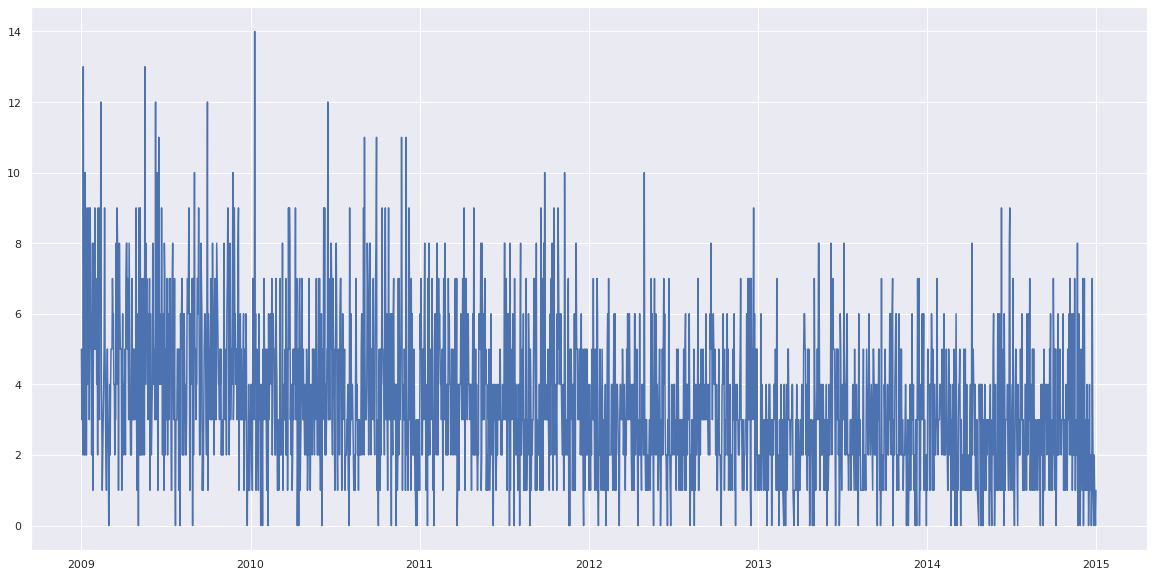

In [170]:
plt.figure(figsize = (20,10))
plt.plot(accident_series)

In [171]:
result = adfuller(accident_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.303163
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


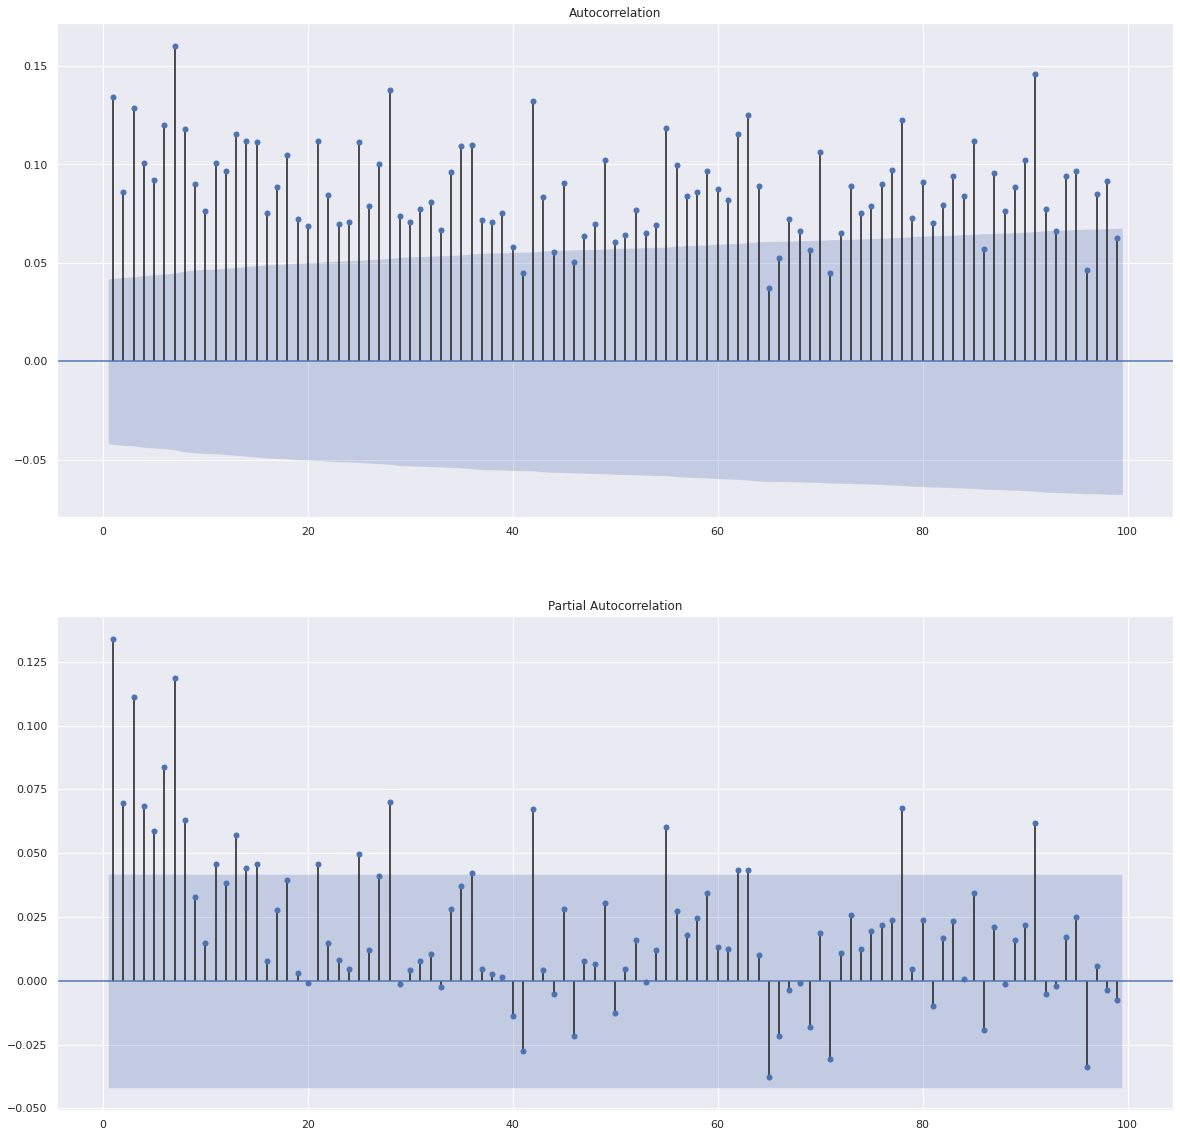

In [172]:
plt.figure(figsize = (20,20))
plt.subplot(211)
plot_acf(accident_series, ax=plt.gca(), lags = np.arange(1,100))
plt.subplot(212)
plot_pacf(accident_series, ax=plt.gca(), lags = np.arange(1,100))
plt.show()

In [173]:

stationary = difference(accident_series)

stationary.index = accident_series.index[1:]

In [174]:

result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.603429
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


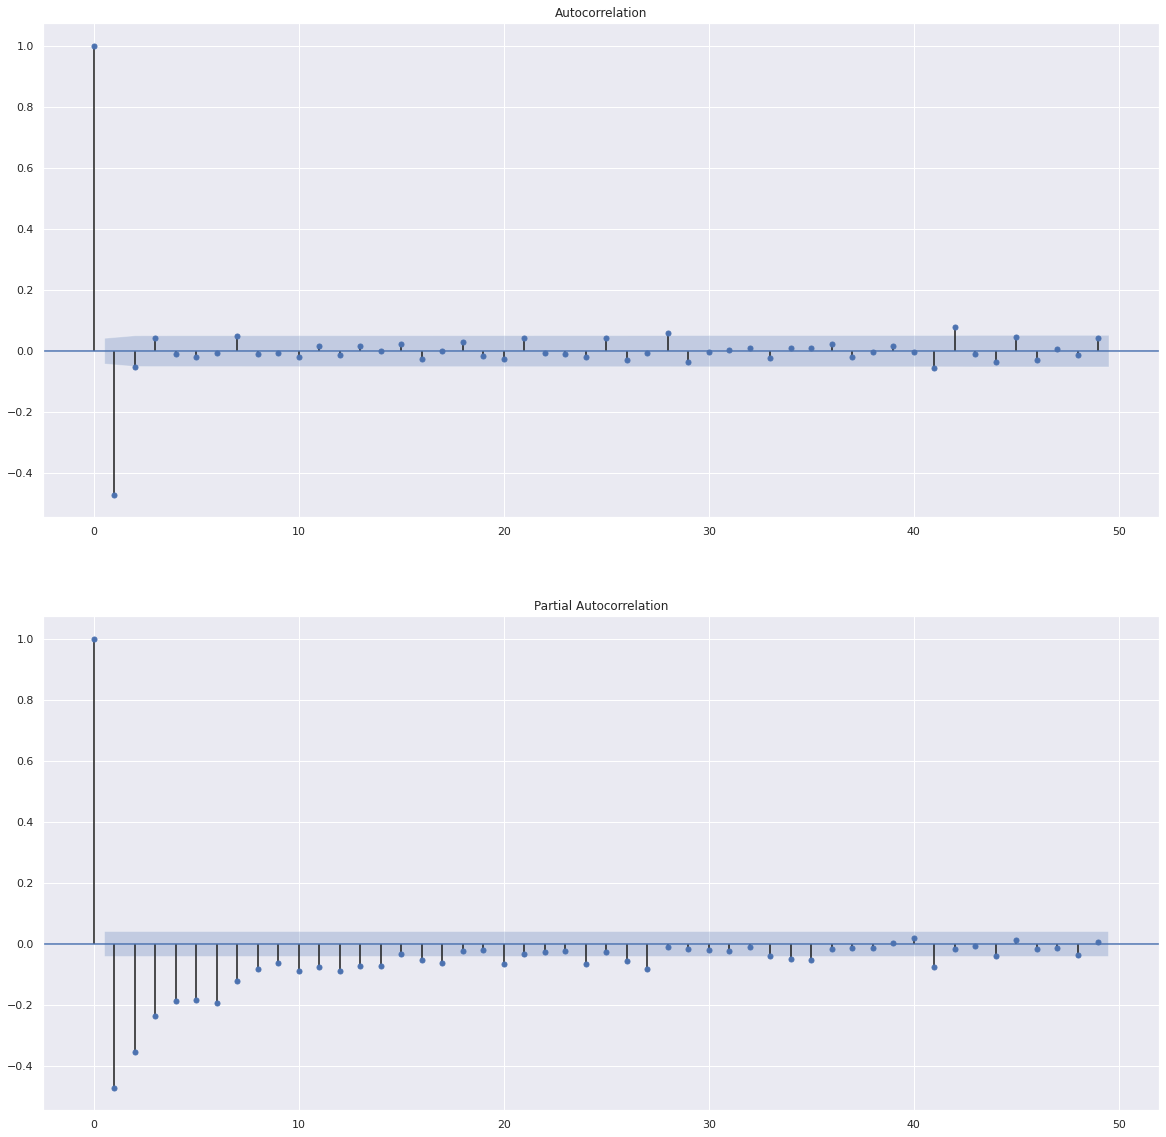

In [175]:
#diff
plt.figure(figsize = (20,20))
plt.subplot(211)
plot_acf(stationary, ax=plt.gca(), lags = np.arange(0,50))
plt.subplot(212)
plot_pacf(stationary, ax=plt.gca(), lags = np.arange(0,50))
plt.show()

In [176]:
accident_series = accident_series.astype('float')

RMSE: 2.105


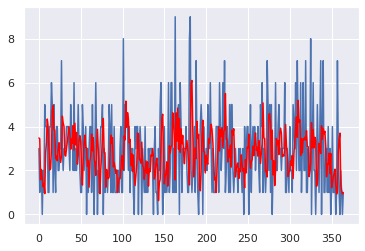

In [177]:
X = accident_series.values
train, test = X[0:(len(X)-365)], X[(len(X)-365):len(X)]
history = [x for x in train]
predictions = []
for i in range(len(test)):
    model = ARIMA(history, order = (2,1,0))
    model_fit = model.fit(disp = 0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    #print('>Predicted=%3.f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [178]:
r2_score(test,predictions)

-0.3444628346984151

In [179]:
birmingham['Year'].value_counts()

2005    4084
2007    3820
2006    3809
2009    3289
2010    2876
2014    2628
2011    2508
2013    2445
2012    2216
Name: Year, dtype: int64

In [180]:
new_weather_dict = {2:3, 3:5, 4:2, 5:4, 7:1.36, 8:1.36, 9:1.36}

In [181]:

birmingham['Weather_Conditions'].replace(new_weather_dict, inplace = True)

In [182]:
birmingham['Weather_Conditions'].value_counts()

1.00    20690
3.00     3514
1.36     2680
2.00      288
4.00      288
5.00      198
6.00       17
Name: Weather_Conditions, dtype: int64

In [183]:
birmingham.head()

,Date,Day_of_Week,Time,Local_Authority_(District),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year,Month,Hour
45960,02/01/2012,2,22:18,300,30,4,1.0,1.0,2012,1,22.0
45961,04/01/2012,4,17:56,300,30,4,3.0,2.0,2012,1,17.0
45962,10/01/2012,3,14:40,300,30,1,1.0,1.0,2012,1,14.0
45963,14/01/2012,7,02:39,300,30,4,1.0,2.0,2012,1,2.0
45964,03/01/2012,3,14:00,300,30,1,1.0,1.0,2012,1,14.0


In [184]:
len(birmingham)

27675

In [185]:
birmingham[birmingham['Weather_Conditions']<7]['Weather_Conditions'].mean()

1.3621246612466524

In [190]:
birmingham['Light_Conditions'].value_counts()   # light engineering

1.00    19769
2.00     7576
1.85      166
3.00      114
4.00       50
Name: Light_Conditions, dtype: int64

In [187]:
new_light_dict = {4:2, 5:3, 6:4, 7:1.85}

In [188]:
birmingham['Light_Conditions'].replace(new_light_dict, inplace = True)

In [189]:
birmingham['Light_Conditions'].value_counts()

1.00    19769
2.00     7576
1.85      166
3.00      114
4.00       50
Name: Light_Conditions, dtype: int64

In [191]:
birmingham['Road_Surface_Conditions'].value_counts()      # road engineering

1.0    19286
2.0     7787
4.0      438
3.0      151
5.0       13
Name: Road_Surface_Conditions, dtype: int64

In [192]:
birminghamdf = birmingham[['Date','Light_Conditions','Weather_Conditions','Road_Surface_Conditions']]    # final dataframe

In [193]:
birminghamdf

,Date,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
45960,02/01/2012,2.0,1.0,1.0
45961,04/01/2012,2.0,3.0,2.0
45962,10/01/2012,1.0,1.0,1.0
45963,14/01/2012,2.0,1.0,2.0
45964,03/01/2012,1.0,1.0,1.0
...,...,...,...,...
1332926,15/12/2014,2.0,1.0,1.0
1332930,23/12/2014,2.0,4.0,2.0
1332931,28/12/2014,2.0,1.0,2.0
1332932,04/09/2014,1.0,1.0,1.0


In [195]:
birminghamdf['Date'] = pd.to_datetime(birminghamdf['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [196]:
birminghammodel = birminghamdf.sort_values(by = 'Date').groupby(['Date']).count()

In [197]:
birminghammodel.rename({'Light_Conditions':'Number_of_Accidents'})

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
Date,,,
2005-01-01,8,8,8
2005-01-02,16,16,16
2005-01-03,12,12,12
2005-01-04,3,3,3
2005-01-05,12,12,12
...,...,...,...
2014-12-27,5,5,5
2014-12-28,6,6,6
2014-12-29,5,5,5


In [198]:

birminghammodel['Count'] = birminghammodel['Light_Conditions']

In [199]:

birminghammodel['Light_Conditions'] = birminghamdf.groupby(['Date']).mean()['Light_Conditions']
birminghammodel['Weather_Conditions'] = birminghamdf.groupby(['Date']).mean()['Weather_Conditions']
birminghammodel['Road_Surface_Conditions'] = birminghamdf.groupby(['Date']).mean()['Road_Surface_Conditions']

In [200]:
birminghammodel

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Count
Date,,,,
2005-01-01,1.750000,1.295000,1.250000,8
2005-01-02,1.375000,1.125000,1.062500,16
2005-01-03,1.500000,1.060000,1.666667,12
2005-01-04,1.333333,1.000000,1.000000,3
2005-01-05,1.000000,1.060000,1.083333,12
...,...,...,...,...
2014-12-27,1.400000,1.872000,1.800000,5
2014-12-28,1.333333,1.180000,1.833333,6
2014-12-29,1.200000,1.000000,2.200000,5


In [201]:
birminghammodel.mean()

Light_Conditions           1.302125
Weather_Conditions         1.350361
Road_Surface_Conditions    1.340869
Count                      8.442648
dtype: float64

In [202]:

birminghammodel9 = birminghammodel['2009':'2014']

birmreset = birminghammodel9.reset_index()

prev_date = birmreset.Date[0]
fill = []
for i, row in birmreset.iterrows():
    if row.Date != prev_date + datetime.timedelta(days=1):
        fill.append(row.Date - datetime.timedelta(days=1))
    prev_date = row.Date

filldf = pd.DataFrame(fill)
filldf['Light_Conditions'] = 0
filldf['Weather_Conditions'] = 0
filldf['Road_Surface_Conditions'] = 0
filldf['Count'] = 0

filldf = filldf.rename({0:'Date'}, axis = 1)

filldf = filldf.drop(index=0)

In [204]:
finalbirm = birmreset.append(filldf)

finalbirm = birmreset.sort_values('Date')

In [205]:
filldf

,Date,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Count
1,2009-03-02,0,0,0,0
2,2009-07-26,0,0,0,0
3,2011-01-27,0,0,0,0
4,2012-04-11,0,0,0,0
5,2012-06-17,0,0,0,0
6,2013-09-06,0,0,0,0
7,2014-05-30,0,0,0,0
8,2014-11-29,0,0,0,0


In [206]:

finalbirm['Light_Conditions'].replace({0:1.302125}, inplace = True)
finalbirm['Weather_Conditions'].replace({0:1.350361}, inplace = True)
finalbirm['Road_Surface_Conditions'].replace({0:1.340869}, inplace = True)

In [207]:
finalbirm = finalbirm.set_index('Date')

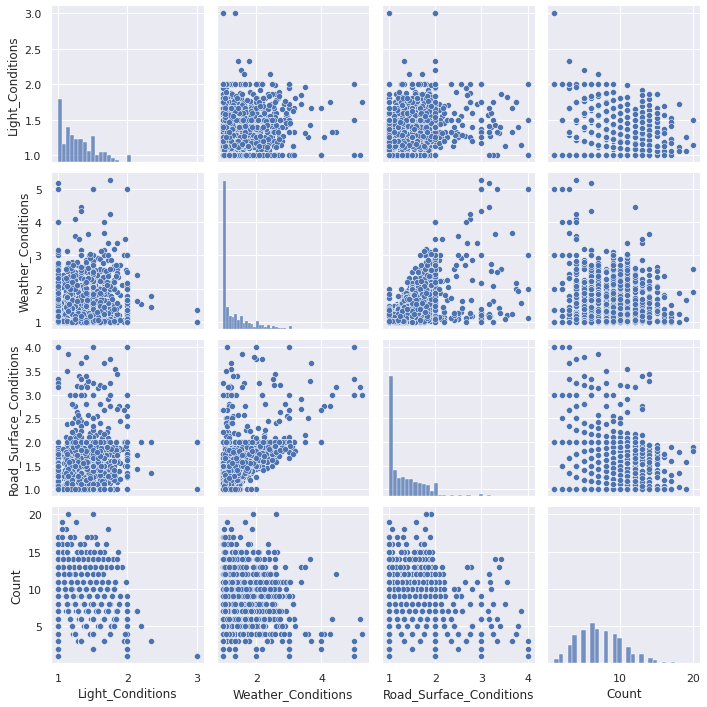

In [208]:
sns.pairplot(finalbirm)

In [209]:
# model

sns.set_style('whitegrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



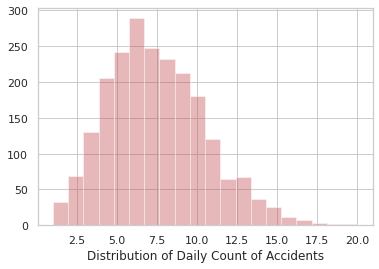

In [210]:
sns.distplot(finalbirm['Count'], kde=False, axlabel = 'Distribution of Daily Count of Accidents', bins = 20, color = 'r')

(array([102., 336., 531., 480., 393., 185., 104.,  37.,  11.,   4.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <a list of 10 Patch objects>)

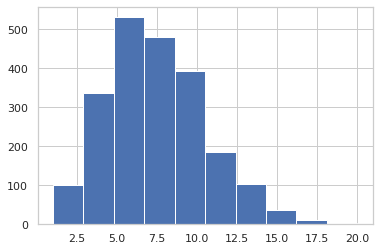

In [211]:
plt.hist(finalbirm['Count'],label = finalbirm['Count'])

In [212]:
y = finalbirm['Count']
X = finalbirm.drop(['Count'], axis = 1)

In [213]:
finalbirm.describe()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Count
count,2183.000000,2183.00000,2183.000000,2183.000000
mean,1.303720,1.36416,1.360354,7.311956
std,0.264857,0.54912,0.465521,3.227301
min,1.000000,1.00000,1.000000,1.000000
25%,1.111111,1.00000,1.000000,5.000000
50%,1.250000,1.09000,1.200000,7.000000
75%,1.500000,1.54400,1.585784,9.000000
max,3.000000,5.25000,4.000000,20.000000


In [214]:
X.head()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
Date,,,
2009-01-01,1.875000,1.225,2.750000
2009-01-02,1.333333,1.000,1.166667
2009-01-03,1.500000,1.000,1.000000
2009-01-04,1.285714,1.000,1.000000
2009-01-05,1.000000,1.180,1.000000


In [215]:
# randomforest 
rmses = []
r2s = []
kf = KFold(n_splits = 4)
for train_index, test_index in kf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    tree = RandomForestRegressor(n_estimators = 1000)
    tree.fit(X_train, y_train)
    treepred = tree.predict(X_val)
    
    mse = mean_squared_error(y_val, treepred)
    rmse = np.sqrt(mse)
    print('RMSE: %.3f' % rmse)
    r2 = r2_score(y_val, treepred)
    print('R2 score: %.3f' % r2)
    
    rmses.append(rmse)
    r2s.append(r2)
    
print('\nMEAN RMSE: %.3f' % np.mean(rmses))
print('MEAN R2: %.3f' % np.mean(r2s))

RMSE: 3.073
R2 score: 0.246
RMSE: 2.111
R2 score: 0.527
RMSE: 2.017
R2 score: 0.485
RMSE: 2.133
R2 score: 0.449

MEAN RMSE: 2.333
MEAN R2: 0.427


In [219]:
rmses = []
r2s = []
kf = KFold(n_splits = 4)
for train_index, test_index in kf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    boost = xgb.XGBRegressor(n_estimators = 1000)
    boost.fit(X_train, y_train)
    boostpred = boost.predict(X_val)
    
    mse = mean_squared_error(y_val, boostpred)
    rmse = np.sqrt(mse)
    print('RMSE: %.3f' % rmse)
    r2 = r2_score(y_val, boostpred)
    print('R2 score: %.3f' % r2)
    
    rmses.append(rmse)
    r2s.append(r2)
    
print('\nMEAN RMSE: %.3f' % np.mean(rmses))
print('MEAN R2: %.3f' % np.mean(r2s))

[12:09:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 2.879
R2 score: 0.338
[12:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.990
R2 score: 0.579
[12:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.872
R2 score: 0.556
[12:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.975
R2 score: 0.527

MEAN RMSE: 2.179
MEAN R2: 0.500


In [222]:
# xgboost

for i in np.arange(100,1200,100):
    rmses = []
    r2s = []
    kf = KFold(n_splits = 4)
    for train_index, test_index in kf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

        boost = xgb.XGBRegressor(n_estimators = 1000, max_depth = 3, subsample = 0.7, min_child_weight = 1,
                                colsample_bytree = 0.9, learning_rate= 0.09)
        boost.fit(X_train, y_train)
        boostpred = boost.predict(X_val)
        mse = mean_squared_error(y_val, boostpred)
        rmse = np.sqrt(mse)
        print('RMSE: %.3f' % rmse)
        r2 = r2_score(y_val, boostpred)
        print('R2 score: %.3f' % r2)

        rmses.append(rmse)
        r2s.append(r2)

    print('\nmax_depth = {}'.format(i))
    print('MEAN RMSE: %.3f' % np.mean(rmses))
    print('MEAN R2: %.3f\n' % np.mean(r2s))

[12:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 2.848
R2 score: 0.352
[12:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.948
R2 score: 0.597
[12:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.805
R2 score: 0.588
[12:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.952
R2 score: 0.538

max_depth = 100
MEAN RMSE: 2.138
MEAN R2: 0.519

[12:11:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 2.848
R2 score: 0.352
[12:11:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.948
R2 score: 0.597
[12:11:16] WARNING: 

In [223]:
X_train, X_test = X[0:(len(X)-31)], X[(len(X)-31):len(X)]
y_train, y_test = y[0:(len(y)-31)], y[(len(y)-31):len(y)]

In [224]:
#xgboost tuning 
boost = xgb.XGBRegressor(n_estimators = 1000, max_depth = 3, subsample = 0.7, min_child_weight = 1,
                            colsample_bytree = 0.9, learning_rate= 0.09)
boost.fit(X_train, y_train)
boostpred = boost.predict(X_test)

mse = mean_squared_error(y_test, boostpred)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)
r2 = r2_score(y_test, boostpred)
print('R2 score: %.3f' % r2)

[12:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.897
R2 score: 0.640


In [225]:
boost = pd.DataFrame(y_test)
boost['Count'] = boostpred

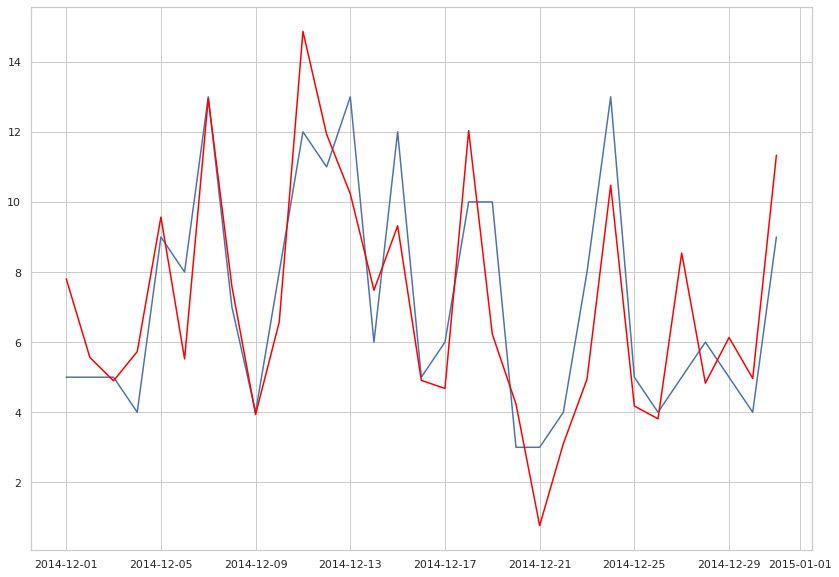

In [233]:
plt.figure(figsize=(14,10))
plt.plot(y_test)
plt.plot(boost, color='red')

In [227]:
finalbirm.describe()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Count
count,2183.000000,2183.00000,2183.000000,2183.000000
mean,1.303720,1.36416,1.360354,7.311956
std,0.264857,0.54912,0.465521,3.227301
min,1.000000,1.00000,1.000000,1.000000
25%,1.111111,1.00000,1.000000,5.000000
50%,1.250000,1.09000,1.200000,7.000000
75%,1.500000,1.54400,1.585784,9.000000
max,3.000000,5.25000,4.000000,20.000000
